In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import netCDF4 as nc
import pandas as pd
import pygmt


from gmt_plot import gmt_plot
from reshape_matrix import reshape_matrix
from eof_n_optimize import eof_n_optimize

### load data
* data generation <br>
>x: lon, 0 to 360<br>
>y: lat,-81 to 81<br>
>i: month, 1 to 12<br>
>$\omega = 2\pi /12$<br> 
>$0.2\times\mod(abs(y),81)*\sin(\omega i) + 0.1\times\mod(abs(x),360)*\cos(2\omega i)+randn(lon_n*lat_n,1)$<br>

In [2]:
add = '//Users/yayu/Documents/example_data/'

fname = 'vari.1.grd'
f_content = nc.Dataset(add+fname)
f_content.set_auto_mask(False)
lon = f_content.variables["x"][:]
lat = f_content.variables['y'][:]
f_content.close()

grid_month= []
for ind in np.arange(1,13):
    fname = 'vari.'+str(ind)+'.grd'
    f_content = nc.Dataset(add+fname)
    f_content.set_auto_mask(False)
    data_month = f_content.variables['z'][:]
    f_content.close()
    grid_month.append(xr.DataArray(data_month, coords=(lat, lon)))
    

In [3]:
grid_month

[<xarray.DataArray (dim_0: 325, dim_1: 721)>
 array([[ 0.45461497,  0.375914  ,  0.417581  , ..., 18.248499  ,
         16.874321  ,  0.45461497],
        [ 8.699265  , 10.430062  ,  8.698051  , ..., 25.301287  ,
         25.810974  ,  8.699265  ],
        [ 8.699935  ,  8.013204  ,  7.288637  , ..., 28.026424  ,
         26.980234  ,  8.699935  ],
        ...,
        [ 8.297091  ,  7.969157  ,  9.070161  , ..., 25.205172  ,
         26.465164  ,  8.297091  ],
        [ 8.372969  ,  8.295126  ,  8.92869   , ..., 26.936743  ,
         24.537605  ,  8.372969  ],
        [-0.54434496,  0.358317  ,  0.463659  , ..., 16.737997  ,
         17.250362  , -0.54434496]], dtype=float32)
 Coordinates:
   * dim_0    (dim_0) float64 -81.0 -80.5 -80.0 -79.5 ... 79.5 80.0 80.5 81.0
   * dim_1    (dim_1) float64 0.0 0.5 1.0 1.5 2.0 ... 358.5 359.0 359.5 360.0,
 <xarray.DataArray (dim_0: 325, dim_1: 721)>
 array([[ -1.6551194,   0.035898 ,   0.179378 , ..., -17.092361 ,
         -18.663433 ,  -1.655119

### load flag

In [4]:
flag = [1 for i in range(325*721)] #using loops
flag_grid = np.reshape(flag, (325,721))

### reshape data

In [5]:
data = reshape_matrix(grid_month, flag)

In [6]:
data.shape

(12, 234325)

In [7]:
np.max(np.abs(data))

54.012996673583984

### check on data: reshape_matrix works fine

In [8]:
map_amplitude = np.empty((lat.size,lon.size),dtype=float)
map_amplitude2 = np.ravel(map_amplitude)
spacenum=-1
for i in np.arange(0,lat.size*lon.size):
    if(flag[i]==True):
        spacenum=spacenum+1
        map_amplitude2[i]=data[0][spacenum]
map_amplitude = np.reshape(map_amplitude2,(lat.size,lon.size))
grid_amplitude = xr.DataArray(map_amplitude, coords=(lat, lon))  

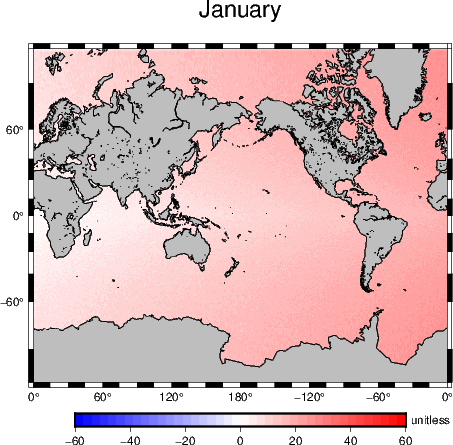

In [9]:
gmt_plot(grid_amplitude,cmap_name="polar",c_min=-60,c_max=60,anot=20,region_size=[0,360,-81,81],plot_name='January',unit='unitless',fname=None)


### run EOF

In [10]:
vp, var_porc, eof_p_n, exp_coef_n = eof_n_optimize(data)

### variance explained in percentage

In [11]:
var_porc

array([6.44181193e-15, 3.16408544e-02, 3.17326215e-02, 3.18497163e-02,
       3.21089596e-02, 3.21539480e-02, 3.21947902e-02, 3.23253483e-02,
       3.23846323e-02, 3.24129647e-02, 6.59724186e+00, 9.31139543e+01])

### Mode-1

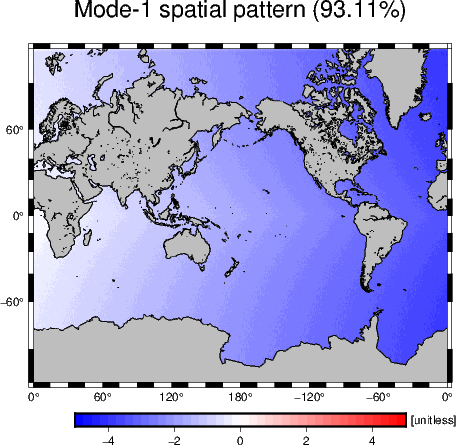

In [12]:
n = -1
s = exp_coef_n[:,n]
amp = np.ravel(eof_p_n[:,n])
map_amplitude = np.empty((lon.size,lat.size),dtype=float)
map_amplitude2 = np.ravel(map_amplitude)
spacenum=-1
flag2 = np.ravel(flag)
for i in np.arange(0,lat.size*lon.size):
    if(flag2[i]==True):
        spacenum=spacenum+1
        map_amplitude2[i]=amp[spacenum]
        
map_amplitude = np.reshape(map_amplitude2,(lat.size,lon.size))
grid_amplitude = xr.DataArray(map_amplitude, coords=(lat, lon))
gmt_plot(grid_amplitude,cmap_name="polar",c_min=-5,c_max=5,anot=2,region_size=[0,360,-81,81],plot_name='Mode-1 spatial pattern ('+str(round(var_porc[n], 2))+'%)',unit='[unitless]',fname=None)


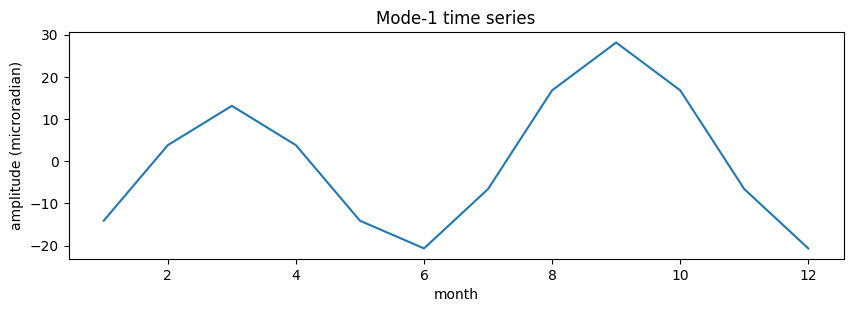

In [13]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(np.arange(0,12)+1,s)
plt.xlabel('month')
plt.ylabel('amplitude (microradian)')
plt.title('Mode-1 time series')
plt.show()

### Mode-2

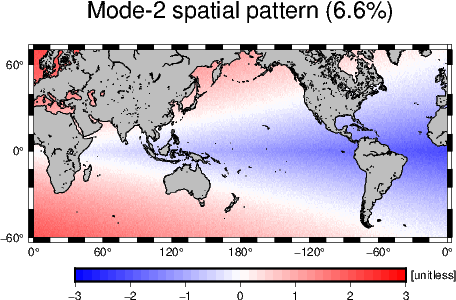

In [14]:
n = -2
s = exp_coef_n[:,n]
amp = np.ravel(eof_p_n[:,n])
map_amplitude = np.empty((lon.size,lat.size),dtype=float)
map_amplitude2 = np.ravel(map_amplitude)
spacenum=-1
flag2 = np.ravel(flag)
for i in np.arange(0,lat.size*lon.size):
    if(flag2[i]==True):
        spacenum=spacenum+1
        map_amplitude2[i]=amp[spacenum]
        
map_amplitude = np.reshape(map_amplitude2,(lat.size,lon.size))
grid_amplitude = xr.DataArray(map_amplitude, coords=(lat, lon))
gmt_plot(grid_amplitude,cmap_name="polar",c_min=-3,c_max=3,anot=1,region_size=[0,360,-60,66],plot_name='Mode-2 spatial pattern ('+str(round(var_porc[n], 2))+'%)',unit='[unitless]',fname=None)


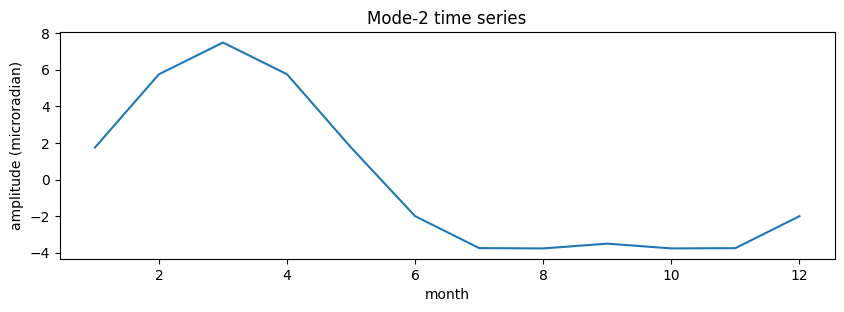

In [15]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(np.arange(0,12)+1,s)
plt.xlabel('month')
plt.ylabel('amplitude (microradian)')
plt.title('Mode-2 time series')
plt.show()

### Mode-3

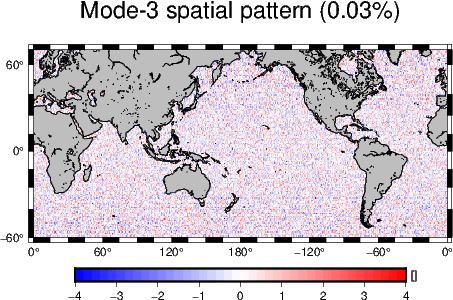

In [70]:
n = -3
s = exp_coef_n[:,n]*-1
amp = np.ravel(eof_p_n[:,n])*-1
map_amplitude = np.empty((lon.size,lat.size),dtype=float)
map_amplitude2 = np.ravel(map_amplitude)
spacenum=-1
flag2 = np.ravel(flag)
for i in np.arange(0,lat.size*lon.size):
    if(flag2[i]==True):
        spacenum=spacenum+1
        map_amplitude2[i]=amp[spacenum]
        
map_amplitude = np.reshape(map_amplitude2,(lat.size,lon.size))
grid_amplitude = xr.DataArray(map_amplitude, coords=(lat, lon))
gmt_plot(grid_amplitude,cmap_name="polar",c_min=-4,c_max=4,anot=1,region_size=[0,360,-60,66],plot_name='Mode-3 spatial pattern ('+str(round(var_porc[n], 2))+'%)',unit='[]',fname=None)


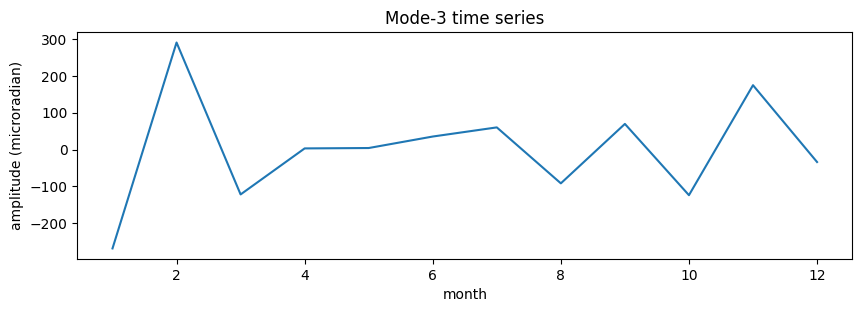

In [71]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(np.arange(0,12)+1,s)
plt.xlabel('month')
plt.ylabel('amplitude (microradian)')
plt.title('Mode-3 time series')
plt.show()